In [80]:
#공통으로 설정할것 

from IPython.display import display
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import mglearn

from sklearn.model_selection import train_test_split
# train , test data 나눠줄때 사용하는 것 

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
# 위에것은 교과서에 없는 내용인데, 숫자 마이너스 부호 깨질때 쓰는거임 

import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgunbd.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
# 폰트 계속 깨져서 폰트 설정 
# 이건 책에 없는거임 

In [81]:
import pandas as pd 

In [82]:
df1 = pd.read_excel(r"C:\Users\shipo\Data\KMOU project\해양 데이터\First\2019 해양사고_해양경찰.xlsx", encoding="utf-8")

In [74]:
df1.columns

Index(['발생일시', '관할해경서', '발생해역', '위도', '경도', '기상상태', '발생원인', '발생유형', '사고선박수',
       '발생인원', '구조', '부상', '사망', '실종', '선 종', '톤수'],
      dtype='object')

In [75]:
df1

,발생일시,관할해경서,발생해역,위도,경도,기상상태,발생원인,발생유형,사고선박수,발생인원,구조,부상,사망,실종,선 종,톤수
0,2019-12-31 22:04:00,포항,영해,0 | 0 | 0,0 | 0 | 0,양호,관리소홀,기타,1,0,0,0,0,0,모터보트,1.07
1,2019-12-31 15:13:00,포항,영해,35 | 52 | 3,129 | 45 | 55,양호,운항부주의,충돌,1,12,12,0,0,0,어선,29.00
2,2019-12-31 15:13:00,포항,영해,35 | 52 | 3,129 | 45 | 55,양호,운항부주의,충돌,1,15,15,0,0,0,화물선,1415.00
3,2019-12-31 09:33:00,통영,협수로,34 | 41 | 6,128 | 3 | 59,양호,운항부주의,부유물감김,1,3,3,0,0,0,어선,4.96
4,2019-12-31 08:38:00,군산,항계 내,35 | 59 | 18,126 | 41 | 43,양호,관리소홀,침수,1,0,0,0,0,0,어선,8.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815,2019-01-01 14:08:00,인천,영해,37 | 21 | 28,126 | 25 | 49,양호,운항부주의,부유물감김,1,6,6,0,0,0,모터보트,19.50
3816,2019-01-01 09:14:00,인천,협수로,37 | 13 | 0,126 | 9 | 0,양호,운항부주의,침수,1,2,2,0,0,0,어선,7.31
3817,2019-01-01 07:59:00,완도,항계 내,34 | 28 | 52,126 | 56 | 41,양호,운항부주의,좌초/좌주,1,3,3,0,0,0,모터보트,1.33
3818,2019-01-01 03:31:00,태안,영해,36 | 46 | 60,126 | 1 | 0,양호,운항부주의,침몰,1,0,0,0,0,0,기타,0.50


In [76]:

for i in ['위도', '경도']:
    df1.drop(i,axis=1,inplace=True)
    
df1 = pd.get_dummies(df1)

In [77]:
# 상관계수 파악
corr_matrix = df1.corr()
corr_matrix[['사망']].sort_values(by='사망',ascending=False)
A= corr_matrix[['사망']].sort_values(by='사망',ascending=False)

In [78]:
A

,사망
사망,1.000000
실종,0.346628
발생유형_작업 중 인명사상,0.151909
발생원인_기타,0.146138
기상상태_풍랑주의보,0.095305
...,...
발생유형_부유물감김,-0.035429
발생유형_기관손상,-0.054395
발생원인_정비불량,-0.069020
기상상태_양호,-0.070843


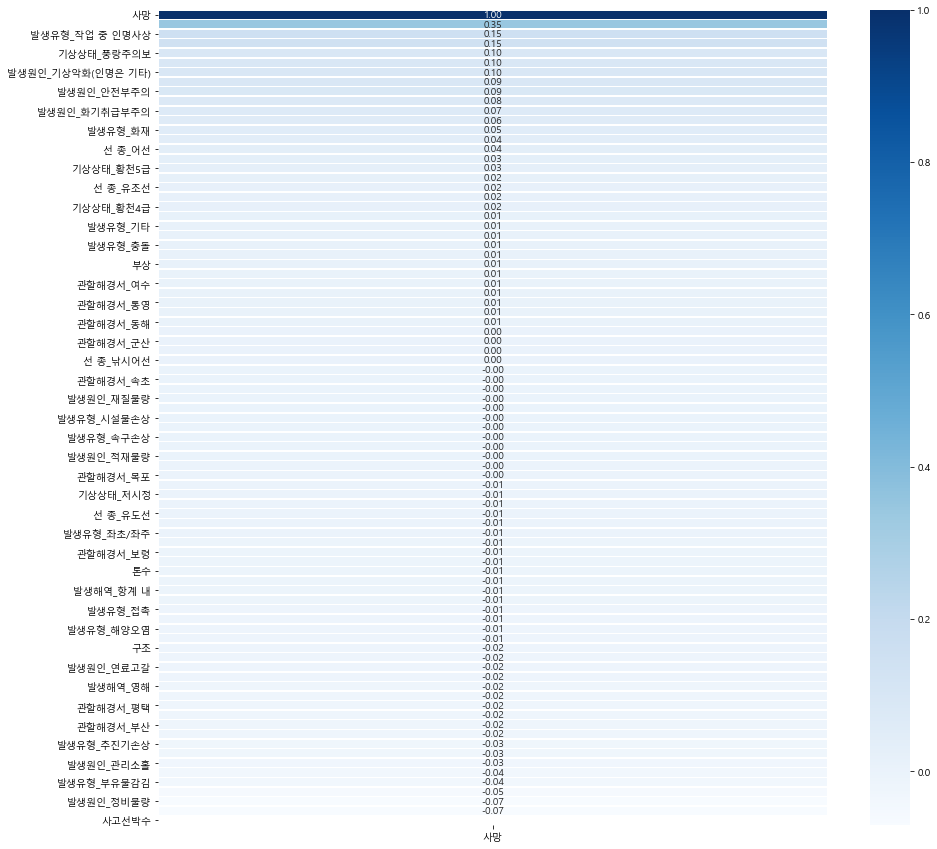

In [79]:
# 그래프 상관관계로 표현하기 
%matplotlib inline   
import matplotlib.pyplot as plt 
import seaborn as sns   

plt.figure(figsize=(15,15))
sns.heatmap(A, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

plt.savefig(r"C:\Users\shipo\Data\KMOU project\그림 자료\해경상관계수.png", encoding="utf-8")

,해양사고발생(월),해양사고장소(위분),해양사고장소(위초),해양사고장소(경분),해양사고장소(경초),선박중요도,선박톤수,사망합계(선원+여객),실종합계(선원+여객),인명피해합계(사망+실종),...,톤수범위(통계용)_50~100톤미만,톤수범위(통계용)_5~10톤미만,톤수범위(통계용)_미상,선박용도(통계용)_기타선,선박용도(통계용)_수상레저기구,선박용도(통계용)_어선,선박용도(통계용)_여객선,선박용도(통계용)_예인선,선박용도(통계용)_유조선,선박용도(통계용)_화물선
0,1,59,42,53,30,1,149.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,59,42,53,30,2,3.00,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,49,48,7,58,1,2.28,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,4,57,2,10,1,155.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2,49,22,51,1,3.53,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269,12,47,0,20,0,1,3.57,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3270,1,33,14,38,16,1,4.65,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3271,4,47,8,24,36,1,280.00,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3272,3,45,24,21,0,1,60876.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
